## Exploring Coffee Shops in Manchester, UK

## Table of Contents
##### 1. Introduction
##### 2. Data Collection from APIs
##### 3. Data Cleaning
##### 4. Methodolgy
##### 5. Analysis
##### 6. Results and Discussion
##### 7. Conclusion

### 1. Introduction

Though tea is still the most popular hot drink within the UK, coffee drinking is certainly on the rise in UK while tea consumption is falling. For this reason,in this project, my aim is to find best coffee shops in Manchester, UK by using Foursquare API and Zomato API.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!pip install lxml

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 5.5MB 5.1MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages

## Data acquisition

To get location and other information about venues in Manchester, I used various data which is obtained from various sources on the internet.

In [2]:
listt = pd.read_html("https://en.wikipedia.org/wiki/M_postcode_area")
df = listt[1]
df = df.rename(columns={'Postcode district':'Postcode'})
df['Postcode']= df['Postcode'].str.replace(r"\(.*\)","")
df = df.drop(df.index[49]).reset_index(drop=True)
df.head()

,Postcode,Post town,Coverage,Local authority area
0,M1,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester
1,M2,MANCHESTER,"Deansgate, City Centre",Manchester
2,M3,MANCHESTER,"City Centre, Deansgate, Castlefield",Manchester
3,M3,SALFORD,"Blackfriars, Greengate, Trinity",Salford
4,M4,MANCHESTER,"Ancoats, Northern Quarter, Strangeways",Manchester


In [3]:
df_lat_long = pd.read_csv('postcode-outcodes.csv')
df_lat_long = df_lat_long.rename(columns={'postcode':'Postcode'})
df_lat_long.head()


,id,Postcode,latitude,longitude
0,2,AB10,57.13514,-2.11731
1,3,AB11,57.13875,-2.09089
2,4,AB12,57.10100,-2.11060
3,5,AB13,57.10801,-2.23776
4,6,AB14,57.10076,-2.27073


In [4]:
df_new = pd.merge(df, df_lat_long, on='Postcode')
df_new = df_new[['Postcode', 'Post town', 'Coverage', 'Local authority area', 'latitude', 'longitude']]
df_new

,Postcode,Post town,Coverage,Local authority area,latitude,longitude
0,M1,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,53.477340,-2.235080
1,M2,MANCHESTER,"Deansgate, City Centre",Manchester,53.480030,-2.242630
2,M3,MANCHESTER,"City Centre, Deansgate, Castlefield",Manchester,53.483610,-2.250180
3,M3,SALFORD,"Blackfriars, Greengate, Trinity",Salford,53.483610,-2.250180
4,M4,MANCHESTER,"Ancoats, Northern Quarter, Strangeways",Manchester,53.484550,-2.229090
5,M5,SALFORD,"Ordsall, Seedley, Weaste, University",Salford,53.479030,-2.284820
6,M6,SALFORD,"Pendleton, Irlams o' th' Height, Langworthy, S...",Salford,53.491590,-2.296960
7,M7,SALFORD,"Higher Broughton, Cheetwood, Lower Broughton, ...",Salford,53.505160,-2.260860
8,M8,MANCHESTER,"Crumpsall, Cheetham Hill",Manchester,53.508800,-2.238270
9,M9,MANCHESTER,"Harpurhey, Blackley",Manchester,53.521430,-2.212690


### Use geopy library to get the latitude and longitude values of Manchester City.


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below.

In [5]:
address = 'Manchester, UK'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester City are 53.4794892, -2.2451148.


In [6]:
# create map of Manchester using latitude and longitude values
map_manchester = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, loc, cov in zip(df_new['latitude'], df_new['longitude'], df_new['Local authority area'], df_new['Coverage']):
    label = '{}, {}'.format(cov, loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker( [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manchester)  
    
map_manchester

### 2. Data Collection from APIs

In [8]:
CLIENT_ID = 'WKBRV1KESRPMV0IDVVG243W4TSD32542XD3SJY4N5YOYS430' # your Foursquare ID
CLIENT_SECRET = 'WEWY2SFEBSFDFO3COMU5V4EBDQAF1YCUMPQGR1SISCUQA4IS' # your Foursquare Secret
VERSION = '20200618' # Foursquare API version


In [54]:
#df_man = df_new[df_new['Local authority area'] == 'Manchester'].reset_index(drop=True)
#df_man

In [9]:
cov_latitude = df_new.loc[0, 'latitude'] # Coverage latitude value
cov_longitude = df_new.loc[0, 'longitude'] # Coveragelongitude value

cov_name = df_new.loc[0, 'Coverage'] # Covergae name

print('Latitude and longitude values of {} are {}, {}.'.format(cov_name, 
                                                               cov_latitude, 
                                                               cov_longitude))

Latitude and longitude values of Piccadilly, City Centre, Market Street are 53.477340000000005, -2.23508.


In [146]:
# type your answer here
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
   cov_latitude, 
   cov_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


venues = results['response']['groups'][0]['items']
#ratings= result['response']['venue']['rating']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,The Molly House,Pub,53.477325,-2.237201
1,Richmond Tea Rooms,Tea Room,53.477652,-2.236810
2,Takk,Coffee Shop,53.481130,-2.232531
3,Northern Monk Refectory,Beer Bar,53.481286,-2.232283
4,Bundobust,Indian Restaurant,53.480870,-2.234693


In [147]:
results = requests.get(url).json()
#results

In [148]:
venues = results['response']['groups'][0]['items']
#venues

In [13]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [14]:
# create map of venues of Manchester using latitude and longitude values
map_nearby_venues = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng, cat, na in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = '{}, {}'.format(na, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker( [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nearby_venues)  
    
map_nearby_venues

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=900):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Coverage', 
                  'Coverage Latitude', 
                  'Coverage Longitude',
                'Venue id',          
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We will restrict coverage to city centre of Manchester.

In [17]:
df_new = df_new.loc[0:4, :]
df_new

,Postcode,Post town,Coverage,Local authority area,latitude,longitude
0,M1,MANCHESTER,"Piccadilly, City Centre, Market Street",Manchester,53.47734,-2.23508
1,M2,MANCHESTER,"Deansgate, City Centre",Manchester,53.48003,-2.24263
2,M3,MANCHESTER,"City Centre, Deansgate, Castlefield",Manchester,53.48361,-2.25018
3,M3,SALFORD,"Blackfriars, Greengate, Trinity",Salford,53.48361,-2.25018
4,M4,MANCHESTER,"Ancoats, Northern Quarter, Strangeways",Manchester,53.48455,-2.22909


In [90]:
man_venues = getNearbyVenues(names=df_new['Coverage'],
                                   latitudes=df_new['latitude'],
                                   longitudes=df_new['longitude'] )

Piccadilly, City Centre, Market Street
Deansgate, City Centre
City Centre, Deansgate, Castlefield
Blackfriars, Greengate, Trinity
Ancoats, Northern Quarter, Strangeways


In [91]:
print(man_venues.shape)
man_venues.head()

(500, 8)


,Coverage,Coverage Latitude,Coverage Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,4cbde546adcd5481cc5f36a2,The Molly House,53.477325,-2.237201,Pub
1,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,4e5a826452b1b78b81aaf8f6,Richmond Tea Rooms,53.477652,-2.236810,Tea Room
2,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,51041c88e4b09faeb9587f7c,Piccadilly Place,53.477720,-2.233302,Plaza
3,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,4bd204aa462cb713986adb07,Habesha,53.477220,-2.237309,Ethiopian Restaurant
4,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,4b15a7cff964a520e2b123e3,Alan Turing Memorial Statue,53.476690,-2.236049,Monument / Landmark


#### 3. Data Cleaning

We get only the coffee shops and cafes of the city centre.

In [200]:
# Extract the coffee shops/cafes
man_coffees = man_venues[(man_venues['Venue Category']=='Coffee Shop') | (man_venues['Venue Category']=='Café')].reset_index(drop = True)
man_coffees

,Coverage,Coverage Latitude,Coverage Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,50ccb105e4b0981e06f7212b,Takk,53.481130,-2.232531,Coffee Shop
1,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,57580a2d498e63eb97bbc9be,Idle Hands,53.481288,-2.233041,Coffee Shop
2,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,55895f21498e9b51c189fdcd,Ezra & Gil,53.482068,-2.232842,Coffee Shop
3,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,51b9abaf498eb59c5a64910f,Fig and Sparrow,53.482626,-2.235609,Coffee Shop
4,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,51fd0805498ed9b6695956d3,Moose Coffee,53.480682,-2.240591,Coffee Shop
5,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,5ac2241497cf5a3a55741ce5,Just Between Friends,53.483454,-2.235236,Coffee Shop
6,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,54b780a7498ea2af055d63bf,Costa Coffee,53.472734,-2.239394,Coffee Shop
7,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,53a05de7498e51117e0e9808,Federal,53.484234,-2.238594,Café
8,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,4aecbadcf964a520b2ca21e3,Starbucks,53.473700,-2.240029,Coffee Shop
9,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,4ddfd1e9fa76b3b01608e036,Home Sweet Home,53.484066,-2.235957,Café


In [201]:
print(man_coffees.shape[0], 'coffee shops were returned by Foursquare in the city centre.')
#man_coffees['Venue id'].nunique()

68 coffee shops were returned by Foursquare in the city centre.


In [199]:
#man_coffees= man_coffees.drop_duplicates(subset='Venue id', keep='first', inplace=True)
#man_coffees

The list of coffee shops was obtained by querying foursquare through the API. As I use a free tier account, the results of my queries were limited in some cases. So I will also use the Zomato API which is similar to Foursquare. Zomato API allows to search for any given venue based on certain search filters such as query, latitude, longitude and more. Zomato also requires a Zomato user key which can be accessed with a developer account.

We'll use the Venue, Latitute, and Longitude values of various venues fetched from Foursquare API to use the search API and get more information regarding each venue from Zomato API.

In [202]:
headers = {'user-key': '90bcf8a8777ba6859f09940e9ea78e55'}
venues_information = []

for index, row in man_coffees.iterrows():
    #print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['Venue'], row['Venue Latitude'], row['Venue Longitude'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])
zomato_venues.head()

,venue,latitude,longitude,price_for_two,price_range,rating,address
0,Takk,53.4813333333,-2.2326666667,15.0,1.0,3.7,"6 Tariff Street, Northern Quarter, Manchester ..."
1,Big Hands Bar,53.4629730000,-2.2303940000,30.0,2.0,0,"296 Oxford Road, University District, Manchest..."
2,Ezra & Gil,53.4819360000,-2.2324730000,15.0,1.0,3.3,"20 Hilton Street, Northern Quarter, Manchester..."
3,Fig and Sparrow,53.4821790000,-2.2363630000,20.0,2.0,3.5,"20 Oldham Street, Northern Quarter, Manchester..."
4,Moose Coffee,53.4805130000,-2.2407360000,20.0,2.0,3.6,"20 York Street, Market Street, Manchester M2 3BB"


In [204]:
zomato_venues['average_price'] = zomato_venues['price_for_two']/2
#zomato_venues = zomato_venues.drop(columns = 'price_for_two')
zomato_venues

,venue,latitude,longitude,price_for_two,price_range,rating,address,average_price
0,Takk,53.4813333333,-2.2326666667,15.0,1.0,3.7,"6 Tariff Street, Northern Quarter, Manchester ...",7.5
1,Big Hands Bar,53.4629730000,-2.2303940000,30.0,2.0,0,"296 Oxford Road, University District, Manchest...",15.0
2,Ezra & Gil,53.4819360000,-2.2324730000,15.0,1.0,3.3,"20 Hilton Street, Northern Quarter, Manchester...",7.5
3,Fig and Sparrow,53.4821790000,-2.2363630000,20.0,2.0,3.5,"20 Oldham Street, Northern Quarter, Manchester...",10.0
4,Moose Coffee,53.4805130000,-2.2407360000,20.0,2.0,3.6,"20 York Street, Market Street, Manchester M2 3BB",10.0
5,Friend's Takeaway,53.5089190000,-2.2424350000,15.0,1.0,0,"408 Cheetham Hill, Cheetham Hill, Manchester M...",7.5
6,Cheeky Coffee,53.4733333333,-2.2403333333,15.0,1.0,0,"The Quadrangle, Hulmes Street, Oxford Road, Ma...",7.5
7,Federal Cafe & Bar,53.4840810000,-2.2385110000,20.0,2.0,3.6,"9 Nicholas Croft, Northern Quarter, Manchester...",10.0
8,Starbucks,53.4737290000,-2.2398690000,15.0,1.0,0,"1-5 Oxford Road, University District, Manchest...",7.5
9,Home Sweet Home,53.4841666667,-2.2360000000,30.0,2.0,4.1,"49-51 Edge Street, Northern Quarter, Mancheste...",15.0


In [206]:
man_coffees['Venue Latitude'] = man_coffees['Venue Latitude'].apply(lambda lat: round(float(lat), 3))
man_coffees['Venue Longitude'] = man_coffees['Venue Longitude'].apply(lambda lng: round(float(lng), 3))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 3))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 3))

In [208]:
man_coffees.head()

,Coverage,Coverage Latitude,Coverage Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,50ccb105e4b0981e06f7212b,Takk,53.481,-2.233,Coffee Shop
1,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,57580a2d498e63eb97bbc9be,Idle Hands,53.481,-2.233,Coffee Shop
2,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,55895f21498e9b51c189fdcd,Ezra & Gil,53.482,-2.233,Coffee Shop
3,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,51b9abaf498eb59c5a64910f,Fig and Sparrow,53.483,-2.236,Coffee Shop
4,"Piccadilly, City Centre, Market Street",53.47734,-2.23508,51fd0805498ed9b6695956d3,Moose Coffee,53.481,-2.241,Coffee Shop


In [209]:
zomato_venues = zomato_venues.astype({'longitude':'float', 'latitude':'float', 'rating':'float'})
#zomato_venues = zomato_venues.rename(columns={'longitude':'Venue Longitude', 'latitude':'Venue Latitude','venue':'Venue'})
zomato_venues.head()

,venue,latitude,longitude,price_for_two,price_range,rating,address,average_price
0,Takk,53.481,-2.233,15.0,1.0,3.7,"6 Tariff Street, Northern Quarter, Manchester ...",7.5
1,Big Hands Bar,53.463,-2.230,30.0,2.0,0.0,"296 Oxford Road, University District, Manchest...",15.0
2,Ezra & Gil,53.482,-2.232,15.0,1.0,3.3,"20 Hilton Street, Northern Quarter, Manchester...",7.5
3,Fig and Sparrow,53.482,-2.236,20.0,2.0,3.5,"20 Oldham Street, Northern Quarter, Manchester...",10.0
4,Moose Coffee,53.481,-2.241,20.0,2.0,3.6,"20 York Street, Market Street, Manchester M2 3BB",10.0


Now we have also price range, rating and average price of each coffee shops.

Let's locate these coffee shops on the map.

In [210]:
dataset = pd.concat([man_coffees, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['Venue Latitude'] - dataset['latitude']
dataset['lng_diff'] = dataset['Venue Longitude'] - dataset['longitude']
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.004) & (abs(dataset['lng_diff']) <= 0.004)].reset_index(drop = True)
selected_venues= selected_venues[['Venue', 'Venue id', 'Venue Latitude','Venue Longitude','price_range', 'rating', 'average_price', 'address']]
#selected_venues= selected_venues.drop()
selected_venues.head()                              

,Venue,Venue id,Venue Latitude,Venue Longitude,price_range,rating,average_price,address
0,Takk,50ccb105e4b0981e06f7212b,53.481,-2.233,1.0,3.7,7.5,"6 Tariff Street, Northern Quarter, Manchester ..."
1,Ezra & Gil,55895f21498e9b51c189fdcd,53.482,-2.233,1.0,3.3,7.5,"20 Hilton Street, Northern Quarter, Manchester..."
2,Fig and Sparrow,51b9abaf498eb59c5a64910f,53.483,-2.236,2.0,3.5,10.0,"20 Oldham Street, Northern Quarter, Manchester..."
3,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB"
4,Costa Coffee,54b780a7498ea2af055d63bf,53.473,-2.239,1.0,0.0,7.5,"The Quadrangle, Hulmes Street, Oxford Road, Ma..."


### 4. Methodology 
This project aims at identifying the coffee shops in Manchester based on their rating and average costs. This would enable any visitor to identify the venues he/she wants to visit based on their rating and cost preference.

As a first step, we retrieved the data from two APIs (Foursquare and Zomato). We extract venue information from the center of Manchester, up to a distance of 1 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.

Secondly, we then explored the data retrieved from the two APIs and we carefully combined these two dataset based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each coffee shops.

Next, we'll analyse the data that we created based on the ratings and price of each coffee shop. We'll identify places where many coffee shop are located so that any visitor can go to one place and enjoy the option to choose amongst many coffee shop options. We'll also explore areas that are high rated and those that are low rated while also plotting the map of high and low priced venues. Lastly, we'll cluster the coffee shop based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.

Finally, we'll discuss and conclude which coffee shop to be explored based on visitor requirement of rating and cost.

### 5.Analysis

#### Categories

We have various types of coffee shops in the final dataset. We will take a look at the coffee shops and check which are the majority venue categories in the list.

In [214]:
venue_distribution = selected_venues ['Venue'].value_counts()
venue_distribution 

Starbucks                     11
Federal                        5
Moose Coffee                   5
Grindsmith Coffee Roasters     3
Fig and Sparrow                3
Michaels Coffee House          3
Takk                           3
Ezra & Gil                     3
Pot Kettle Black               3
Home Sweet Home                3
Ancoats Coffee Co              1
Java Bar Espresso              1
Rollers                        1
Costa Coffee                   1
Name: Venue, dtype: int64

<BarContainer object of 14 artists>

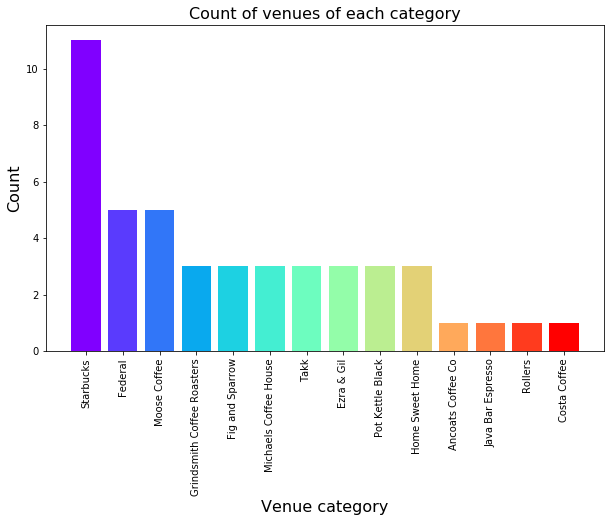

In [219]:
import matplotlib.pyplot as plt
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (10, 6))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

As we can see the majority of the coffee shops are Starbucks, Federal and Moose Coffee . So, as a tourist, if you're looking for Sturbucks, you're in luck; there is 11 Sturbucks in the city centre.  

### Ratings
Rating Rating of a coffee shop is an important factor on which a visitor decides whether it is worth it to visit the place. So we will first see what is the average rating for all the venues in the city. Next, we will plot the venues on the map and color code them.

We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating.

Text(0.5, 1.0, 'Count of venues with given rating')

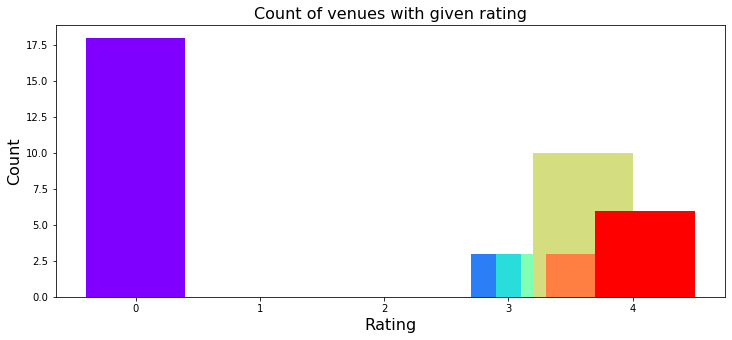

In [220]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues ['rating'].value_counts().sort_index()
plt.figure(figsize = (12, 5))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

From the plot above, it is clear that majority of coffee shops have their rating close to 4. We can also say that there are many coffee shops which have not been rated yet. So their ratings are equal to zero.

Let's firstly drop coffee shops which have 0 rating.

In [227]:
selected_venues= selected_venues.dropna()
selected_venues

,Venue,Venue id,Venue Latitude,Venue Longitude,price_range,rating,average_price,address,rating_bin
0,Takk,50ccb105e4b0981e06f7212b,53.481,-2.233,1.0,3.7,7.5,"6 Tariff Street, Northern Quarter, Manchester ...",Good
1,Ezra & Gil,55895f21498e9b51c189fdcd,53.482,-2.233,1.0,3.3,7.5,"20 Hilton Street, Northern Quarter, Manchester...",Good
2,Fig and Sparrow,51b9abaf498eb59c5a64910f,53.483,-2.236,2.0,3.5,10.0,"20 Oldham Street, Northern Quarter, Manchester...",Good
3,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB",Good
5,Federal,53a05de7498e51117e0e9808,53.484,-2.239,2.0,3.6,10.0,"9 Nicholas Croft, Northern Quarter, Manchester...",Good
7,Home Sweet Home,4ddfd1e9fa76b3b01608e036,53.484,-2.236,2.0,4.1,15.0,"49-51 Edge Street, Northern Quarter, Mancheste...",Very good
8,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB",Good
9,Michaels Coffee House,59958736237dee7fd7c5564c,53.482,-2.244,3.0,4.1,22.5,"Blackpool Fold, Chapel Walks, Market Street, M...",Very good
10,Pot Kettle Black,5433aeb8498ea7981494f5aa,53.483,-2.246,2.0,3.1,10.0,"14 Barton Arcade, Deansgate, Manchester M5 2BW",Good
11,Federal,53a05de7498e51117e0e9808,53.484,-2.239,2.0,3.6,10.0,"9 Nicholas Croft, Northern Quarter, Manchester...",Good


Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:

In [228]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)
selected_venues 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Venue,Venue id,Venue Latitude,Venue Longitude,price_range,rating,average_price,address,rating_bin
0,Takk,50ccb105e4b0981e06f7212b,53.481,-2.233,1.0,3.7,7.5,"6 Tariff Street, Northern Quarter, Manchester ...",Good
1,Ezra & Gil,55895f21498e9b51c189fdcd,53.482,-2.233,1.0,3.3,7.5,"20 Hilton Street, Northern Quarter, Manchester...",Good
2,Fig and Sparrow,51b9abaf498eb59c5a64910f,53.483,-2.236,2.0,3.5,10.0,"20 Oldham Street, Northern Quarter, Manchester...",Good
3,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB",Good
5,Federal,53a05de7498e51117e0e9808,53.484,-2.239,2.0,3.6,10.0,"9 Nicholas Croft, Northern Quarter, Manchester...",Good
7,Home Sweet Home,4ddfd1e9fa76b3b01608e036,53.484,-2.236,2.0,4.1,15.0,"49-51 Edge Street, Northern Quarter, Mancheste...",Very good
8,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB",Good
9,Michaels Coffee House,59958736237dee7fd7c5564c,53.482,-2.244,3.0,4.1,22.5,"Blackpool Fold, Chapel Walks, Market Street, M...",Very good
10,Pot Kettle Black,5433aeb8498ea7981494f5aa,53.483,-2.246,2.0,3.1,10.0,"14 Barton Arcade, Deansgate, Manchester M5 2BW",Good
11,Federal,53a05de7498e51117e0e9808,53.484,-2.239,2.0,3.6,10.0,"9 Nicholas Croft, Northern Quarter, Manchester...",Good


In [229]:

color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'black'}

coffee_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['Venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['Venue Latitude'], 
                                                          selected_venues['Venue Longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(coffee_map)  


coffee_map


The map has the location of all the coffee shops. If someone wants to explore new coffes shops, they should definitely check out.
### Price

 We will now take a look the coffe shops based on the price values. We have two price features for our venues, one is average_price which defines the average cost for one person and the other is price_range which determines the price range as defined by Zomato.

We will first explore the average_price using a scatter plot between the price and the count of venues with that average price. We'll size the points based on the price to highlight their price.

Text(0.5, 1.0, 'Count of venues with given average price')

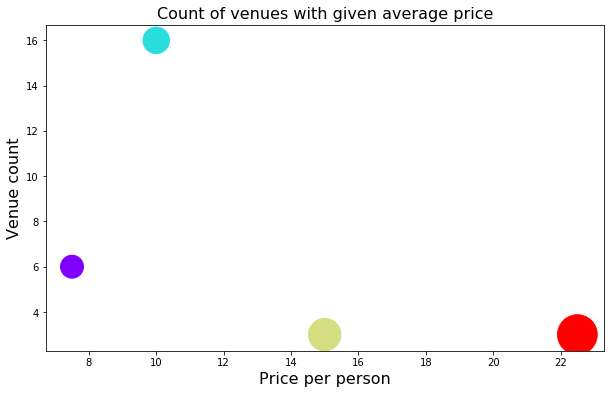

In [231]:

average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (10, 6))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*70, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

### Clustering
We will now cluster all these coffe shops based on their price range, location and more to identify similar coffe shops and the relationship amongst them. We'll cluster the coffe shops into two separate groups.

In [128]:

from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 3

clustering = selected_venues.drop(['Venue', 'address', 'rating_bin','Venue id'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues

,cluster_labels,Venue,Venue id,Venue Latitude,Venue Longitude,price_range,rating,average_price,address,rating_bin
0,0,Takk,50ccb105e4b0981e06f7212b,53.481,-2.233,1.0,3.7,7.5,"6 Tariff Street, Northern Quarter, Manchester ...",Good
1,0,Ezra & Gil,55895f21498e9b51c189fdcd,53.482,-2.233,1.0,3.3,7.5,"20 Hilton Street, Northern Quarter, Manchester...",Good
2,0,Fig and Sparrow,51b9abaf498eb59c5a64910f,53.483,-2.236,2.0,3.5,10.0,"20 Oldham Street, Northern Quarter, Manchester...",Good
3,0,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB",Good
5,0,Federal,53a05de7498e51117e0e9808,53.484,-2.239,2.0,3.6,10.0,"9 Nicholas Croft, Northern Quarter, Manchester...",Good
7,1,Home Sweet Home,4ddfd1e9fa76b3b01608e036,53.484,-2.236,2.0,4.1,15.0,"49-51 Edge Street, Northern Quarter, Mancheste...",Very good
8,0,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB",Good
9,2,Michaels Coffee House,59958736237dee7fd7c5564c,53.482,-2.244,3.0,4.1,22.5,"Blackpool Fold, Chapel Walks, Market Street, M...",Very good
10,0,Pot Kettle Black,5433aeb8498ea7981494f5aa,53.483,-2.246,2.0,3.1,10.0,"14 Barton Arcade, Deansgate, Manchester M5 2BW",Good
11,0,Federal,53a05de7498e51117e0e9808,53.484,-2.239,2.0,3.6,10.0,"9 Nicholas Croft, Northern Quarter, Manchester...",Good


In [129]:
map_coffees = folium.Map(location=[latitude, longitude], zoom_start=13)
color_map = { 0: 'green', 1: 'red', 2: 'blue'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['Venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['Venue Latitude'], 
                                                        selected_venues['Venue Longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(map_coffees)
    # add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(map_coffees)


map_coffees

In [131]:

result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,Venue,Venue id,Venue Latitude,Venue Longitude,price_range,rating,average_price,address,rating_bin
0,0,Takk,50ccb105e4b0981e06f7212b,53.481,-2.233,1.0,3.7,7.5,"6 Tariff Street, Northern Quarter, Manchester ...",Good
1,0,Ezra & Gil,55895f21498e9b51c189fdcd,53.482,-2.233,1.0,3.3,7.5,"20 Hilton Street, Northern Quarter, Manchester...",Good
2,0,Fig and Sparrow,51b9abaf498eb59c5a64910f,53.483,-2.236,2.0,3.5,10.0,"20 Oldham Street, Northern Quarter, Manchester...",Good
3,0,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB",Good
4,0,Federal,53a05de7498e51117e0e9808,53.484,-2.239,2.0,3.6,10.0,"9 Nicholas Croft, Northern Quarter, Manchester...",Good
5,0,Moose Coffee,51fd0805498ed9b6695956d3,53.481,-2.241,2.0,3.6,10.0,"20 York Street, Market Street, Manchester M2 3BB",Good
6,0,Pot Kettle Black,5433aeb8498ea7981494f5aa,53.483,-2.246,2.0,3.1,10.0,"14 Barton Arcade, Deansgate, Manchester M5 2BW",Good
7,0,Federal,53a05de7498e51117e0e9808,53.484,-2.239,2.0,3.6,10.0,"9 Nicholas Croft, Northern Quarter, Manchester...",Good
8,0,Fig and Sparrow,51b9abaf498eb59c5a64910f,53.483,-2.236,2.0,3.5,10.0,"20 Oldham Street, Northern Quarter, Manchester...",Good
9,0,Ezra & Gil,55895f21498e9b51c189fdcd,53.482,-2.233,1.0,3.3,7.5,"20 Hilton Street, Northern Quarter, Manchester...",Good


In [132]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 1.73 and rating spread around 3.49


In [133]:

result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,Venue,Venue id,Venue Latitude,Venue Longitude,price_range,rating,average_price,address,rating_bin
0,1,Home Sweet Home,4ddfd1e9fa76b3b01608e036,53.484,-2.236,2.0,4.1,15.0,"49-51 Edge Street, Northern Quarter, Mancheste...",Very good
1,1,Home Sweet Home,4ddfd1e9fa76b3b01608e036,53.484,-2.236,2.0,4.1,15.0,"49-51 Edge Street, Northern Quarter, Mancheste...",Very good
2,1,Home Sweet Home,4ddfd1e9fa76b3b01608e036,53.484,-2.236,2.0,4.1,15.0,"49-51 Edge Street, Northern Quarter, Mancheste...",Very good


In [134]:

print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 2.00 and rating spread around 4.10


In [135]:
result = selected_venues[selected_venues['cluster_labels'] == 2]
print("Cluster 2")
result.head(10).reset_index(drop = True)

Cluster 2


,cluster_labels,Venue,Venue id,Venue Latitude,Venue Longitude,price_range,rating,average_price,address,rating_bin
0,2,Michaels Coffee House,59958736237dee7fd7c5564c,53.482,-2.244,3.0,4.1,22.5,"Blackpool Fold, Chapel Walks, Market Street, M...",Very good
1,2,Michaels Coffee House,59958736237dee7fd7c5564c,53.482,-2.244,3.0,4.1,22.5,"Blackpool Fold, Chapel Walks, Market Street, M...",Very good
2,2,Michaels Coffee House,59958736237dee7fd7c5564c,53.482,-2.244,3.0,4.1,22.5,"Blackpool Fold, Chapel Walks, Market Street, M...",Very good


In [136]:
print("These venues for cluster 2 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 2 have mean price range of 3.00 and rating spread around 4.10


### 6.Results and Discussion

Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Manchester, UK.

After collecting data from the Foursquare and Zomato APIs, we got a list of 68 different coffee shops. However, not all coffee shops from the two APIs were identical. Hence, we had to inspect their latitude and longitude values as well as names to combine them and remove all the outliers. This resulted in a total venue count of 49.

The majority of coffee shops have ratings close to 4. This means that most coffee shops provide good quality food which is liked by the people of the city, thus indicating the high rating.

When we take a look at the price values of coffee shops, we explore that many coffee shops have prices which are in the range of £7.5 to £ 22.5 for one person. Although, the variation in prices is very large, most of the places have average price of £10.

Finally, through clusters we identified that there are many coffee shops which are relatively average priced of £10. On the other hand, there are few venues which are high priced with high rating.

If you're looking for average priced places with relatively average rating, you should check cluster 0.


### 7.Conclusion

The purpose of this project was to explore the places that a person visiting Manchester could visit. The coffee shops have been identified using Foursquare and Zomato API and have been plotted on the map. The map reveals that there are many coffee shops with average priced and good rating in Manchester a person can visit.